# RICE LEAF DISEASE DETECTION USING CONVOLUTIONAL NEURAL NETWORK


**IMPORT LIBRARY CNN**

In [1]:
import os
import numpy as np
import pandas as pd
import tqdm as tqdm
import cv2 as cv
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout , BatchNormalization 
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
tf.keras.applications.VGG16
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

In [2]:
encoder = OneHotEncoder()     #LabelEncoder encode labels with value between 0 and n_classes-1
encoder.fit([[0],[1],[2],[3]])   

OneHotEncoder()

**INITIAL STATE**

In [3]:
input_path = []
label = []
data = []
paths = []
result = []
fpath = []
for r,d,f in os.walk(r"../input/ricediseasedataset/rice-disease-dataset/data/Rice___Brown_Spot"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(0)
        input_path.append(os.path.join("Rice_Brown_Spot","Rice_Brown_Spot",path))
        result.append(encoder.transform([[0]]).toarray())
print(len(paths))

636


In [4]:
paths = []
for r,d,f in os.walk(r"../input/ricediseasedataset/rice-disease-dataset/data/Rice___Healthy"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(1)
        input_path.append(os.path.join("Rice_Healthy","Rice_Healthy",path))
        result.append(encoder.transform([[1]]).toarray())
print(len(paths))

1488


In [5]:
paths = []
for r,d,f in os.walk(r"../input/ricediseasedataset/rice-disease-dataset/data/Rice___Leaf_Blast"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(2)
        input_path.append(os.path.join("Rice_Leaf_Blast","Rice_Leaf_Blast",path))
        result.append(encoder.transform([[2]]).toarray())
print(len(paths))

977


In [6]:
paths = []
for r,d,f in os.walk(r"../input/ricediseasedataset/rice-disease-dataset/data/Rice___Neck_Blast"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(3)
        input_path.append(os.path.join("Healthy","Healthy",path))
        result.append(encoder.transform([[3]]).toarray())
print(len(paths))

1000


**LOADING DATASET**

In [7]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,Rice_Healthy/Rice_Healthy/../input/ricedisease...,1
1,Rice_Healthy/Rice_Healthy/../input/ricedisease...,1
2,Rice_Healthy/Rice_Healthy/../input/ricedisease...,1
3,Rice_Brown_Spot/Rice_Brown_Spot/../input/riced...,0
4,Healthy/Healthy/../input/ricediseasedataset/ri...,3


In [8]:
pd.unique(df['label'])

array([1, 0, 3, 2])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

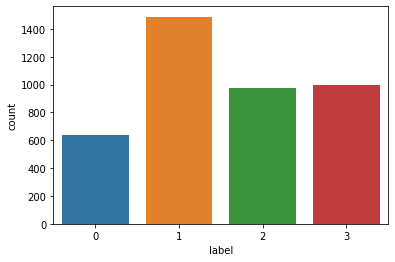

In [9]:
import seaborn as sns
sns.countplot(df['label'])

In [10]:
print("Total no.of images are :",len(result))


Total no.of images are : 4101


In [11]:
result = np.array(result)
result = result.reshape(-1,4)

In [12]:
data = np.array(data)
data.shape

(4101, 224, 224, 3)

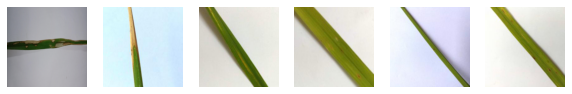

In [13]:
%matplotlib inline
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.axis('off')
plt.show()

In [14]:
x_train , x_test , y_train , y_test = train_test_split(data , result , test_size = 0.2 , shuffle = True , random_state = 42)

In [15]:
print("Shape of an image in x_train : ",x_train[0].shape)
print("Shape of an image in x_test : ",x_test[0].shape)

Shape of an image in x_train :  (224, 224, 3)
Shape of an image in x_test :  (224, 224, 3)


In [16]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [17]:
print("x_train Shape : ", x_train.shape) 
print("x_test Shape : ", x_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

x_train Shape :  (3280, 224, 224, 3)
x_test Shape :  (821, 224, 224, 3)
y_train Shape:  (3280, 4)
y_test Shape:  (821, 4)


In [18]:
modelVGG = VGG16(include_top = False,weights = 'imagenet',classifier_activation = 'softmax',input_shape = (224, 224, 3))

2022-11-25 16:22:56.906368: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 16:22:57.012944: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 16:22:57.013785: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 16:22:57.015078: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 2s 0us/step


In [19]:
for layer in modelVGG.layers:
    layer.trainable = False

In [20]:
num_classes = 4
for (i,layer) in enumerate(modelVGG.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model,num_classes):
        top_model = bottom_model.output
        top_model = GlobalAveragePooling2D()(top_model)
        top_model = Dense(1024,activation='relu')(top_model)
        top_model = Dense(1024,activation='relu')(top_model)
        top_model = Dense(512,activation='relu')(top_model)
        top_model = Dense(4,activation='softmax')(top_model)
        return top_model

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [21]:
num_classes = 4
FC_Head = lw(modelVGG , num_classes)
model = Model(inputs = modelVGG.input,outputs = FC_Head)

In [22]:
print(model.summary())


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
# summarize filters in each convolutional layer
#from keras.applications.vgg16 import VGG16
#from matplotlib import pyplot
# load the model
#model = VGG16()
# summarize filter shapes
for layer in model.layers:
# check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [24]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

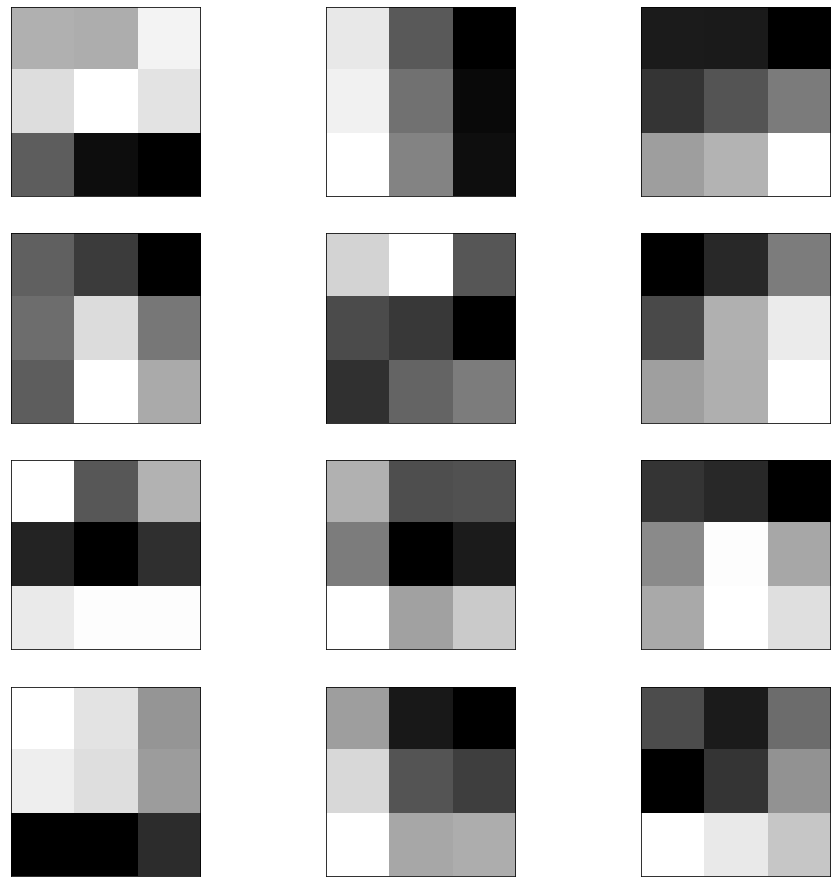

In [25]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(16,16))
nof_filters, ix = 4, 1
for i in range(nof_filters):
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        ax = plt.subplot(nof_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()


In [26]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [27]:
from keras.preprocessing.image import ImageDataGenerator 
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=False, 
    vertical_flip=False)

datagen.fit(x_train)

In [28]:
history = model.fit(x_train , y_train , epochs = 10 , validation_data = (x_test , y_test), verbose = 1)

2022-11-25 16:23:06.346925: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-11-25 16:23:07.850101: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


103/103 [==============================] - 21s 114ms/step - loss: 0.8608 - accuracy: 0.6970 - val_loss: 0.5072 - val_accuracy: 0.7856
Epoch 2/10
103/103 [==============================] - 8s 75ms/step - loss: 0.4933 - accuracy: 0.8040 - val_loss: 0.5394 - val_accuracy: 0.7881
Epoch 3/10
103/103 [==============================] - 8s 75ms/step - loss: 0.4425 - accuracy: 0.8165 - val_loss: 0.4930 - val_accuracy: 0.8112
Epoch 4/10
103/103 [==============================] - 8s 75ms/step - loss: 0.3741 - accuracy: 0.8588 - val_loss: 0.4366 - val_accuracy: 0.8197
Epoch 5/10
103/103 [==============================] - 8s 75ms/step - loss: 0.3303 - accuracy: 0.8710 - val_loss: 0.4015 - val_accuracy: 0.8526
Epoch 6/10
103/103 [==============================] - 8s 75ms/step - loss: 0.2911 - accuracy: 0.8866 - val_loss: 0.5467 - val_accuracy: 0.8136
Epoch 7/10
103/103 [==============================] - 8s 75ms/step - loss: 0.2661 - accuracy: 0.9003 - val_loss: 0.4662 - val_accuracy: 0.8295
Epoch 8/

In [29]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

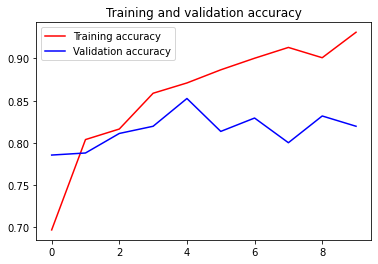

<Figure size 432x288 with 0 Axes>

In [30]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

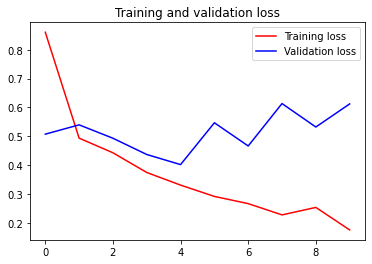

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [32]:
def names(number):
    if number==0:
        return "It's a leaf with disease Brown Spots"
    elif number==1:
        return "It's a Healthy leaf"
    elif number==2:
        return "It's a leaf with disease Leaf Blast"
    elif number==3:
        return "It's a leaf with disease Leaf Blast"

In [33]:
from matplotlib.pyplot import imshow
def Prediction(img):
    #img = Image.open(r"../input/corn-or-maize-leaf-disease-dataset/data/Blight/Corn_Blight (1010).JPG")
    x = np.array(img.resize((224,224)))
    x = x.reshape(1,224,224,3)
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(img)
    print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

100.0% Confidence It's a leaf with disease Brown Spots


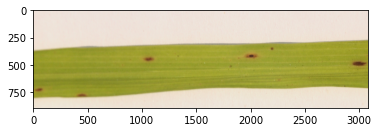

In [34]:
img = Image.open(r"../input/ricediseasedataset/rice-disease-dataset/data/Rice___Brown_Spot/DSC_0305.JPG")
Prediction(img)

In [35]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
26/26 [==============================] - 2s 60ms/step - loss: 0.6121 - accuracy: 0.8197
Test Accuracy: 81.97320103645325
